In [3]:
from datascience import *
from prob140 import *
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
plt.style.use('fivethirtyeight')

In [4]:
from sympy import Symbol,Integral
import numpy as np 
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from fractions import Fraction

* 边缘分布

二维随机变量$(X,Y)$中，$X$和$Y$也都是随机变量，分别有各自的概率分布，称$X$和$Y$的概率分布为二维随机变量$(X,Y)$关于$X$和关于$Y$的**边缘概率分布**，简称**边缘分布**。

定义 1：设二维随机变量$(X,Y)$的联合分布函数为$F(x,y)$，称$F_X(x)=P(X \leqslant x)=P(X \leqslant x, Y \leqslant+\infty)=F(x,+\infty),-\infty<x<+\infty$为**随机变量**$X$**的边缘分布函数**；称$ F_Y(y)=P(Y \leqslant y)=P(X \leqslant+\infty, Y \leqslant y)=F(+\infty, y),-\infty<y<+\infty$为**随机变量**$Y$**的边缘分布函数**。

定义 2：设二维离散型随机变量$(X,Y)$的联合分布律为$P\left(X=x_i, Y=y_j\right)=p_{i j}, i, j=1,2, \cdots$，称概率$P\left(X=x_i\right)=P\left(X=x_i, \cup_j Y=y_j\right)=\sum_j P\left(X=x_i, Y=y_j\right)=\sum_j p_{i j}, \quad i=1,2, \cdots $为**随机变量**$X$**的边缘分布律**，记为$p_i .$，并有$p_i .=P\left(X=x_i\right)=\sum_j p_{i j}, i=1,2, \cdots$；类似，称概率$P\left(Y=y_j\right), j=1,2, \cdots$为**随机变量**$Y$**的边缘分布律**，记为$P_{\cdot j}$，并有$ P_{\cdot j}=P\left(Y=y_j\right)=\sum_i p_{i j}, j=1,2, \cdots$。即，求$X$的边缘分布律为求$(X,Y)$联合分布律表格中的列（或行）和，求$Y$的边缘分布律为求$(X,Y)$联合分布律表格中的行（或列）和。因为边缘分布律位于联合分布律表格的边缘，因此称其为边缘分布律。

下面计算了前文关于一个年级数学和语文成绩分布的联合分布表及其边缘分布律。

In [3]:
k=np.arange(2)

def joint_probability(x,y):
    if x==0 and y==0: return 0.78
    elif x==0 and y==1: return 0.02
    elif x==1 and y==0: return 0.12
    elif x==1 and y==1: return 0.08

joint_table=Table().values('X',k,'Y',k).probability_function(joint_probability)
joint_table.both_marginals() 

,X=0,X=1,Sum: Marginal of Y
Y=1,0.02,0.08,0.1
Y=0,0.78,0.12,0.9
Sum: Marginal of X,0.80,0.20,1.0


In [4]:
joint_table.marginal('Y')

,X=0,X=1,Sum: Marginal of Y
Y=1,0.02,0.08,0.1
Y=0,0.78,0.12,0.9


In [5]:
joint_table.marginal('X')

,X=0,X=1
Y=1,0.02,0.08
Y=0,0.78,0.12
Sum: Marginal of X,0.80,0.20


定义 3：设二维连续型随机变量$X,Y$的联合分布函数为$F(x,y)$，联合密度函数为$f(x,y)$，根据$F_X(x)=F(x,+\infty),-\infty<x<+\infty$，得$\int_{-\infty}^x f_X(u) \mathrm{d} u=\int_{-\infty}^x\left[\int_{-\infty}^{+\infty} f(u, y) \mathrm{d} y\right] \mathrm{d} u$，所以$X$**的边缘密度函数**为$f_X(x)=\int_{-\infty}^{+\infty} f(x, y) \mathrm{d} y$；类似，$Y$**的边缘密度函数**为$f_Y(y)=\int_{-\infty}^{+\infty} f(x, y) \mathrm{d} x$。

例如，定义二维连续型随机变量的联合密度函数$f(x, y)=\left\{\begin{array}{l}30(y-x)^4, \quad 0<x<y<1 \\ 0 \quad \text { otherwise }\end{array}\right.$，绘制图形如下。

In [17]:
def jt_dens(x,y):
    if y < x:
        return 0
    else:
        return 30 * (y-x)**4

Plot_3d(x_limits=(0,1), y_limits=(0,1), f=jt_dens, cstride=4, rstride=4,interactive=True)

interactive(children=(FloatSlider(value=20.0, description='elevation', max=90.0, step=1.0), FloatSlider(value=…

联合密度函数的二重积分定义为变量`jt_dens_pdf`。

In [18]:
x = Symbol('x', positive=True)
y = Symbol('y', positive=True)

joint_density = 30*(y-x)**4
jt_dens_pdf=Integral(joint_density, (y, x, 1), (x, 0, 1))
jt_dens_pdf

Integral(30*(-x + y)**4, (y, x, 1), (x, 0, 1))

估计二重积分的结果为1。

In [19]:
jt_dens_pdf.doit()

1

下图表述了$x$约为0.25时，事件$X \in dx$的概率$P(X \in dx)$，为固定$x$，沿$y$的积分。

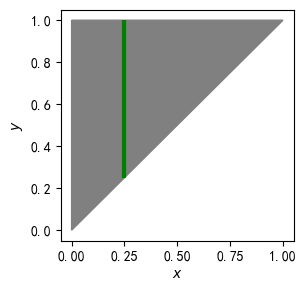

In [66]:
coords=np.arange(0,1+0.1,0.1)
pts_y=[[0,i] for i in coords]
pts_x=[[i,i] for i in coords]
pts_x.reverse()
pts=np.array(pts_y+pts_x)

plt.figure(figsize=(3,3))
t=plt.Polygon(pts, color='gray')
plt.gca().add_patch(t)

plt.vlines(x=0.25,ymin=0.25,ymax =1, linewidth=3, color='green',linestyles='-')

plt.xlabel("$x$")
plt.ylabel("$y$")
plt.xticks(fontsize=10);plt.yticks(fontsize=10)
plt.show()

计算$X$的边缘密度函数$f_X(x)=\int_x^1 30(y-x)^4 d y \\  =\left.30 \cdot \frac{1}{5}(y-x)^5\right|_x ^1 \\  =6(1-x)^5$；计算$Y$的边缘密度函数$f_Y(y)=\int_0^y 30(y-x)^4 d x=6 y^5 $。下面打印了两者的边缘密度函数曲线。

In [31]:
def plot_style(ax):
    # Move the left and bottom spines to x = 0 and y = 0, respectively.
    ax.spines[["left", "bottom"]].set_position(("data", 0))
    # Hide the top and right spines.
    ax.spines[["top", "right"]].set_visible(False)
    ax.plot(1, 0, ">k", transform=ax.get_yaxis_transform(), clip_on=False)
    ax.plot(0, 1, "^k", transform=ax.get_xaxis_transform(), clip_on=False)

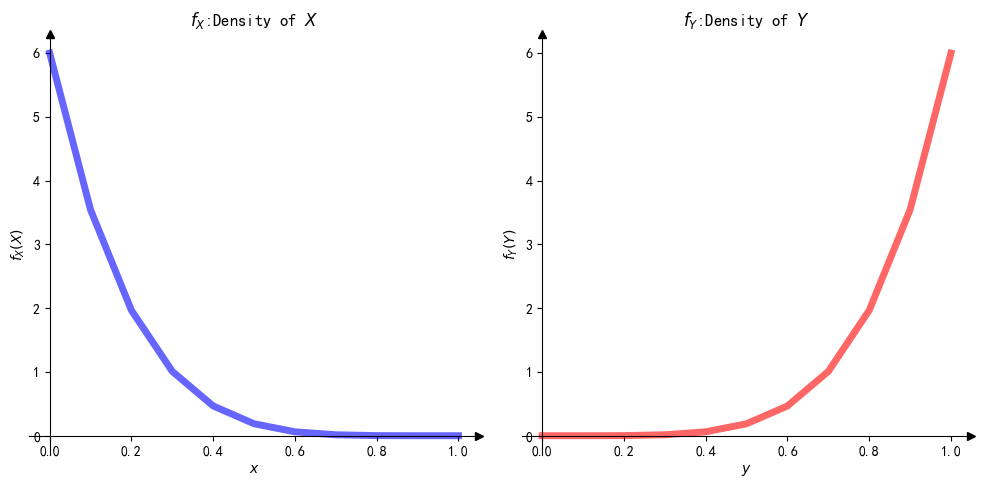

In [48]:
import matplotlib as mpl
mpl.rcParams.update(mpl.rcParamsDefault)

def marginal_density_X(x):
    return 6*(1-x)**5

def marginal_density_Y(y):
    return 6*y**5

plt.rcParams['font.sans-serif'] = ['SimHei']
matplotlib.rcParams['axes.unicode_minus'] = False

fig, axs=plt.subplots(1, 2,figsize=(10,5))
x=np.arange(0,1+0.1,0.1)

axs[0].plot(x, marginal_density_X(x),'b-', lw=5, alpha=0.6)
axs[1].plot(x, marginal_density_Y(x),'r-', lw=5, alpha=0.6)

axs[0].set_title("$f_{X}$:Density of $X$")
axs[1].set_title("$f_{Y}$:Density of $Y$")


axs[0].set_xlabel("$x$")
axs[0].set_ylabel("$f_{X}(X)$")
axs[1].set_xlabel("$y$")
axs[1].set_ylabel("$f_{Y}(Y)$")
plot_style(axs[0])
plot_style(axs[1])
fig.tight_layout()
plt.show()

定理 1：如果$(X, Y) \sim N\left(\mu_1, \mu_2, \sigma_1^2, \sigma_2^2, \rho\right) $，则$X \sim N\left(\mu_1, \sigma_1^2\right), Y \sim N\left(\mu_2, \sigma_2^2\right)$。

* 条件分布

对于二维随机变量$(X,Y)$中的两个随机变量$X$和$Y$，在许多问题中它们的取值往往彼此影响，这使得条件分布成为研究变量之间相依关系的有利工具。对于二维随机变量$(X,Y)$，随机变量$X$的条件分布是在给定$Y$取某个值条件下$X$的分布。

1）二维离散型随机变量的条件分布律

定义 1：设二维离散型随机变量$(X,Y)$的联合分布律为$P\left(X=x_i, Y=y_j\right)=p_{i j}, i, j=1,2, \cdots$，对于固定的$y_i \in \Omega_Y$，记在给定条件$\{Y=y_j\}$下的随机变量$X$为$X \mid Y=y_j$，其值域记为$\Omega_{X \mid Y=y_j}=\left\{x_i: P\left(X=x_i, Y=y_j\right) \neq 0\left(y_j \text { 固定 }\right), i=1,2, \cdots\right\}$。条件分布律$\frac{p_{i j}}{p_{\cdot j}}, i=1,2, \cdots$满足分布律的两条性质：

（1）$P\left(X=x_i \mid Y=y_j\right)=\frac{p_{i j}}{p_{\cdot j}}>0, x_i \in \Omega_X \mid Y=y_j$；

（2）$\sum_i P\left(X=x_i \mid Y=y_j\right)=\sum_i \frac{p_{i j}}{p_{\cdot j}}=1$.

当$x \in \Omega_X$时，在给定条件$\{X=x_j\}$下的随机变量$Y$的条件分布律为$P\left(Y=y_j \mid X=x_i\right)=\frac{p_{i j}}{p_i \cdot}, j=1,2, \cdots $。对于固定的$x_i \in \Omega_X$，记在给定条件$\{X=x_i\}$下的随机变量$Y$为$Y \mid X=x_i$，其值域为$\Omega_{Y \mid X=x_i}=\left\{y_j: P\left(X=x_i, Y=y_j\right) \neq 0\left(x_i\right.\right.$ 固定 $\left.), j=1,2, \cdots\right\}$。同理，条件分布律$\frac{p_{i j}}{p_i \cdot}, j=1,2, \cdots$也满足分布律的两条性质。

定义一个二维离散型随机变量的条件分布律表格`joint_table`，如下。

In [125]:
k = np.arange(3)
arr=np.array([[Fraction(1,18),Fraction(2,9),Fraction(1,18)],[Fraction(2,15),Fraction(2,15),Fraction(1,15)],[Fraction(1,6),Fraction(1,9),Fraction(1,18)]])
print(pd.DataFrame(arr))

def joint_probability(x, y):
    return (arr[x,y])

joint_table=Table().values('X', k, 'Y', k).probability_function(joint_probability)
print(f'total probability={joint_dist.total_probability()}')
joint_table

      0     1     2
0  1/18   2/9  1/18
1  2/15  2/15  1/15
2   1/6   1/9  1/18
total probability=1.0


,X=0,X=1,X=2
Y=2,0.055556,0.066667,0.055556
Y=1,0.222222,0.133333,0.111111
Y=0,0.055556,0.133333,0.166667


计算随机变量$X$和$Y$的边缘分布律。

In [127]:
joint_table.both_marginals()

,X=0,X=1,X=2,Sum: Marginal of Y
Y=2,0.055556,0.066667,0.055556,0.177778
Y=1,0.222222,0.133333,0.111111,0.466667
Y=0,0.055556,0.133333,0.166667,0.355556
Sum: Marginal of X,0.333333,0.333333,0.333333,1.000000


假设知道$Y=1$，则提取满足条件的行，可知该行和的概率为$P(Y=3)=0.466$，并不为1。由$P(X=x \mid Y=1)=\frac{P(X=x, Y=1)}{P(Y=1)}$，计算给定条件$Y=1$时$X$的条件分布为，$P(X=0 \mid Y=3)=\frac{0.222}{0.466}=0.476 \\  P(X=1 \mid Y=3)=\frac{0.133}{0.466}=0.285 \\  P(X=2 \mid Y=3)=\frac{0.111}{0.466}=0.238$。可以直接调用`conditional_dist`方法计算。

In [131]:
def indicator_Y_equals_1(i, j):
    return j==1

joint_table.event(indicator_Y_equals_1, 'X', 'Y')

P(Event) = 0.4666666666666666


,X=0,X=1,X=2
Y=2,,,
Y=1,0.222222,0.133333,0.111111
Y=0,,,


以$Y$为条件计算$X$的条件分布律。 

In [132]:
joint_table.conditional_dist('X', 'Y') # conditional distribution of X given each different value of Y

,X=0,X=1,X=2,Sum
Dist. of X | Y=2,0.312500,0.375000,0.312500,1.0
Dist. of X | Y=1,0.476190,0.285714,0.238095,1.0
Dist. of X | Y=0,0.156250,0.375000,0.468750,1.0
Marginal of X,0.333333,0.333333,0.333333,1.0


以$X$为条件计算$Y$的条件分布律。

In [133]:
joint_table.conditional_dist('Y', 'X') # conditional distribution of Y given each different value of X

,Dist. of Y | X=0,Dist. of Y | X=1,Dist. of Y | X=2,Marginal of Y
Y=2,0.166667,0.2,0.166667,0.177778
Y=1,0.666667,0.4,0.333333,0.466667
Y=0,0.166667,0.4,0.500000,0.355556
Sum,1.000000,1.0,1.000000,1.000000


2）二维连续型随机变量的条件密度函数

定义 2：设$f(x,y)$为二维连续型随机变量$(X,Y)$的联合密度函数，当$y \in \Omega_Y$时，在给定$\{Y=y\}$条件下$X$的条件密度函数为$f_{X \mid Y}(x \mid y)=\frac{f(x, y)}{f_Y(y)},-\infty<x<+\infty \text {, 其中 } f_Y(y)>0$。对于固定的$y \in \Omega_Y$，记在给定条件$\{Y=y\}$下的随机变量$X$为$X \mid Y=y$，其值域记为$\Omega_{X \mid Y=y}=\{x: f(x, y) \neq 0(y$ 固定 $)\}$。条件密度函数$f_{X \mid Y}(x \mid y)$满足密度函数的两条性质：

（1）$f_{X \mid Y}(x \mid y)=\frac{f(x, y)}{f_Y(y)}>0, x \in \Omega_X \mid Y=y$；

（2）$\int_{-\infty}^{+\infty} f_{X \mid Y}(x \mid y) \mathrm{d} x=\int_{-\infty}^{+\infty} \frac{f(x, y)}{f_Y(y)} \mathrm{d} x=\frac{\int_{-\infty}^{+\infty} f(x, y) \mathrm{d} x}{f_Y(y)}=1$。

当$x \in \Omega_X$时，在给定$X=x$条件下$Y$的条件密度函数为$f_{Y \mid X}(y \mid x)=\frac{f(x, y)}{f_X(x)},-\infty<y<+\infty \text {, 其中 } f_X(x)>0$。对于固定的$x \in \Omega_X$，记在给定条件$\{X=x\}$下的随机变量$Y$为$Y \mid X=x$，其值域记为$\Omega_{Y \mid X=x}=\{y: f(x, y) \neq 0(x$ 固定 $)\}$。同理，可以验证$f_{Y \mid X}(y \mid x)$满足密度函数的两条性质。

定义 3：设$f(x,y)$为二维连续型随机变量$(X,Y)$的联合密度函数，当$y \in \Omega_Y$时，在给定条件$\{Y=y\}$下$X$的条件分布函数为$F_{X \mid Y}(x \mid y)=\int_{-\infty}^x f_{X \mid Y}(u \mid y) \mathrm{d} u=\int_{-\infty}^x \frac{f(u, y)}{f_Y(y)} \mathrm{d} u,-\infty<x<+\infty \text {, 其中 } f_Y(y)>0$；当$x \in \Omega_X$时，在给定$\{X=x\}$条件下$Y$的条件分布函数为$F_{Y \mid X}(y \mid x)=\int_{-\infty}^y f_{Y \mid X}(v \mid x) \mathrm{d} v=\int_{-\infty}^y \frac{f(x, v)}{f_X(x)} \mathrm{d} v, \quad-\infty<y<+\infty$, 其中 $f_X(x)>0$。

继续*边缘分布：二维连续型随机变量的联合密度函数*部分的案例，给定条件$X=0.4$时，$Y$的条件密度函数为$f_{Y \mid X=0.4}(y)=\frac{30(y-0.4)^4}{6(1-0.4)^5}=\frac{5}{0.6^5}(y-0.4)^4 \quad y \in(0.4,1)$。同时绘制$Y$的边缘密度函数$f_Y(y)$和条件密度函数$f_{Y \mid X=0.4}(y)$，如下。

In [142]:
y=Symbol('y', positive=True)
conditional_density_Y_given_X_is_04=(5/(0.6**5)) * (y - 0.4)**4
Integral(conditional_density_Y_given_X_is_04, (y, 0.4, 1)).doit()

0.999999999999999

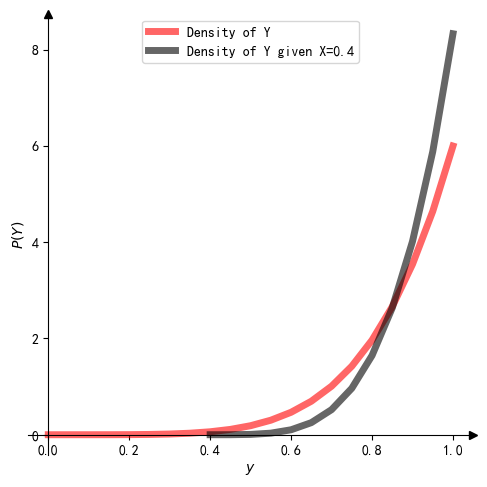

In [164]:
def conditional_density_Y_given_X_is_04_func(y):
    return 5/0.6**5*(y-0.4)**4

def marginal_density_Y(y):
    return 6*y**5

fig, ax=plt.subplots(1, 1,figsize=(5,5))
x=np.arange(0,1+0.05,0.05)
x_c=np.array([i for i in x if i>=0.4])

ax.plot(x, marginal_density_Y(x),'r-', lw=5, alpha=0.6,label="Density of Y")
ax.plot(x_c, conditional_density_Y_given_X_is_04_func(x_c),'k-', lw=5, alpha=0.6,label="Density of Y given X=0.4")

ax.set_xlabel("$y$")
ax.set_ylabel("$P(Y)$")
plot_style(ax)
ax.legend(loc='upper center')
fig.tight_layout()
plt.show()

由条件密度函数$f_{Y \mid X=0.4}(y)$可以计算条件概率（probabilities）和条件期望（expectations），例如$P(Y>0.9 \mid X=0.4)=\int_{0.9}^1 \frac{5}{0.6^5}(y-0.4)^4 d y$。

In [167]:
p_1=Integral(conditional_density_Y_given_X_is_04, (y, 0.9, 1))
print(p_1.doit())
p_1

0.598122427983537


Integral(64.3004115226338*(y - 0.4)**4, (y, 0.9, 1))

由条件密度函数计算条件期望值，$E(Y \mid X=0.4)=\int_{0.4}^1 y \frac{5}{0.6^5}(y-0.4)^4 d y=0.9$。

In [169]:
Integral(y*conditional_density_Y_given_X_is_04, (y, 0.4, 1)).doit()

0.899999999999998

---

* 随机变量的独立性

当两个随机变量的取值规律互不影响时，称它们是相互独立的。

定义 4：设$(X,Y)$为二维随机变量，若对任意$x,y \in R$，都有$F(x, y)=F_X(x) F_Y(y)$成立，则称**随机变量**$X$**与**$Y$**相互独立**。式中，$F(x, y)$为$(X,Y)$的联合分布函数，$F_X(x)$和$ F_Y(y)$分别为$X$和$Y$的边缘分布函数。

定理 2：设计$(X,Y)$为二维离散型随机变量，那么，$X$与$Y$相互独立的充分必要条件是对任意的$i,j=1,2,\cdots$，都有$p_{i j}=p_{i \cdot} p_{\cdot j}$成立，式中，$p_{i j}, i, j=1,2, \cdots$为$(X,Y)$的联合分布律，$p_{i \cdot}, i=1,2, \cdots$和$p_{\cdot j}, j=1,2, \cdots$分别为$X$和$Y$的边缘分布律。相互独立性的直观含义是当$X$取定$x_i$时，$Y$的取值规律不受任何影响，即$P\left(Y=y_j \mid X=x_i\right)=\frac{P\left(X=x_i, Y=y_j\right)}{P\left(X=x_i\right)}=\frac{p_{i j}}{p_i .}=\frac{p_{i \cdot} p_{\cdot j}}{p_i .}=p_{\cdot _j}=P\left(Y=y_j\right)$

例如下述二维随机变量$(X,Y)$中$X$和$Y$相互独立，可以验证$i,j=1,2$都有$p_{i j}=p_{i \cdot} p_{\cdot j}$成立。

In [5]:
k=np.arange(2)

def joint_probability(x,y):
    if x==0:return 0.4
    if x==1: return 0.1

joint_table=Table().values('X',k,'Y',k).probability_function(joint_probability)
joint_table.both_marginals() 

,X=0,X=1,Sum: Marginal of Y
Y=1,0.4,0.1,0.5
Y=0,0.4,0.1,0.5
Sum: Marginal of X,0.8,0.2,1.0


定理 3：若$(X,Y)$为二维连续型随机变量，那么，$X$与$Y$相互独立的充分必要条件是在$f(x,y)$、$f_X(x)$及$f_Y(y)$的一切公共连续点上都有$f(x, y)=f_X(x) \cdot f_Y(y)$成立。式中，$f(x, y)$为$(X,Y)$的联合密度函数，$f_X(x) $和$ f_Y(y)$为$X$和$Y$的边缘密度函数。

定义 5：设$\left(X_1, X_2, \cdots, X_n\right)$为$n$维随机变量，若对任意$\left(x_1, x_2, \cdots, x_n\right) \in R^n$，都有$F\left(x_1, x_2, \cdots, x_n\right)=\prod_{i=1}^n F_{X_i}\left(x_i\right) $成立，则称**随机变量**$X_1, X_2, \cdots, X_n$**相互独立**。式中，$F\left(x_1, x_2, \cdots, x_n\right)$为$\left(X_1, X_2, \cdots, X_n\right)$的联合分布函数，$ F_{X_i}\left(x_i\right)$为$X_i$的边缘分布函数，$i=1,2, \cdots,n$。

当$\left(X_1, X_2, \cdots, X_n\right)$为离散型随机变量时，随机变量$X_1, X_2, \cdots, X_n$相互独立的充要条件是对任意的$x_i \in \Omega_{X_i}, \quad i=1,2, \cdots, n$，都有，$P\left(X_1=x_1, X_2=x_2, \cdots, X_n=x_n\right)=\prod_{i=1}^n P\left(X_i=x_i\right)$成立，式中，$P\left(X_1=x_1, X_2=x_2, \cdots, X_n \right)$为$\left(X_1, X_2, \cdots, X_n\right)$的联合分布律，$P\left(X_i=x_i\right)$为$X_i$的边缘分布律，$i=1,2, \cdots,n$。

当$\left(X_1, X_2, \cdots, X_n\right)$为连续型随机变量时，随机变量$X_1, X_2, \cdots, X_n$相互独立的充要条件是在$f\left(x_1, x_2, \cdots, x_n\right), f_{X_1}\left(x_1\right), f_{X_2}\left(x_2\right), \cdots, f_{X_n}\left(x_n\right)$的一切公共连续点上都有$f\left(x_1, x_2, \cdots, x_n\right)=\prod_{i=1}^n f_{X_i}\left(x_i\right)$成立。式中，$f\left(x_1, x_2, \cdots, x_n\right)$为$\left(X_1, X_2, \cdots, X_n\right)$的联合密度函数，$f_{X_i}\left(x_i\right)$为$X_i$的边缘密度函数，$i=1,2, \cdots,n$。

* 二维随机变量函数的分布

设$(X,Y)$为二维随机变量，则$Z=g(X,Y)$是$(X,Y)$的函数，且$Z$是一维随机变量。如果要由$(X,Y)$的分布求$Z$的分布，一般要将$Z$的分布转化成有关$(X,Y)$的概率分布。

1）二维离散型随机变量函数的分布

设$(X,Y)$是二维离散型随机变量，其分布律为$P\left\{X=x_i, Y=y_j\right\}=p_{i j}, \quad i, j=1,2, \cdots$，$Z=g(X,Y)$是$(X,Y)$的函数，则$Z$也是离散型随机变量，其分布律为$P\left\{Z=z_k\right\}=P\left\{g(X, Y)=z_k\right\}=\sum_{\left\{\left(x_i, y_j\right)\left|g\left(x_i, y_j\right)=z_k\right\rangle\right.} P\left\{X=x_i, Y=y_j\right\} \\ =\sum_{\left\{\left(x_i, y_j\right) \mid g\left(x_i, y_j\right)=z_k\right\}} p_{i j}, \quad k=1,2, \cdots$。

定理 1：设$X \sim B(m, p), Y \sim B(n, p)$，且$X$与$Y$相互独立，则$X+Y \sim B(m+n, p)$；设$X \sim P\left(\lambda_1\right), Y \sim P\left(\lambda_2\right)$，且$X$与$Y$相互独立，则$X+Y \sim P\left(\lambda_1+\lambda_2\right)$。

2）二维连续型随机变量函数的分布

设二维连续型随机变量$(X,Y)$的联合密度函数为$f(x,y)$，则随机变量$(X,Y)$的二元函数$Z=g(X,Y)$的分布函数为$F_Z(z)=P(Z \leqslant z)=P(g(X, Y) \leqslant z)=P\left((X, Y) \in D_z\right)=\iint_{D_z} f(x, y) \mathrm{d} x \mathrm{~d} y$，式中，$\{(X,Y) \in D_z\}$是与$\{g(X,Y) \leqslant z \}$等价的随机事件，而$D_z=\{(x,y):g(x,y)  \leqslant z\}$是$x \bigcirc y$平面上的点集（通常是一个区域或若干个区域的并集）。则$Z=g(X,Y)$的密度函数为$f_Z(z)=F' _Z(z)$。这种计算二维连续型随机变量函数分布的方法称为分布函数法。

定理 2：设随机变量$(X,Y)$的联合密度函数为$f(x,y)$，且$X$的边缘密度函数为$f_X(x)$，$Y$的边缘密度函数为$f_Y(y)$，则随机变量$(X,Y)$的函数$Z=X+Y$的密度函数为$f_Z(z)=\int_{-\infty}^{+\infty} f(x, z-x) \mathrm{d} x \text { 或 } f_Z(z)=\int_{-\infty}^{+\infty} f(z-y, y) \mathrm{d} y$。特别地，当随机变量$X$和$Y$相互独立时，$f_Z(z)=\int_{-\infty}^{+\infty} f_X(x) f_Y(z-x) \mathrm{d} x \text { 或 } f_Z(z)=\int_{-\infty}^{+\infty} f_X(z-y) f_Y(y) \mathrm{d} y$。这两个公式称为**卷积公式**。在概率论中计算相互独立随机变量之和分布的运算称为卷积运算。

定理 3：设$X \sim N\left(\mu_1, \sigma_1^2\right), \quad Y \sim N\left(\mu_2, \sigma_2^2\right)$，且$X$与$Y$相互独立，则$X+Y \sim N\left(\mu_1+\mu_2, \sigma_1^2+\sigma_2^2\right)$。

定理 4：设连续型随机变量$X$和$Y$相互独立，且$X$的分布函数为$F_X(x)$，$Y$的分布函数为$F_Y(y)$，则

（1）随机变量$U=\max (X, Y)$的分布函数为$F_U(u)=F_X(u) F_Y(u)$；

（2）随机变量$V=\min (X, Y)$的分布函数为$F_V(v)=1-\left(1-F_X(v)\right)\left(1-F_Y(v)\right)$。

由定理 4，推广至$n$个相互独立随机变量的情形有，设连续型随机变量$X_1, X_2, \cdots, X_n$相互独立，且$X_i$的分布函数为$F_{X_i}(x), i=1,2, \cdots, n$，则

（1）随机变量$U=\max \left(X_1, X_2, \cdots, X_n\right)$的分布函数为$F_U(u)=\prod_{i=1}^n F_{X_i}(u)$；

（2）随机变量$V=\min \left(X_1, X_2, \cdots, X_n\right)$的分布函数为$ F_V(v)=1-\prod_{i=1}^n\left(1-F_{X_i}(v)\right)$。

---